<a href="https://colab.research.google.com/github/Guryansh/Clustering-Assignment/blob/main/Clustering_Assignment_KMeanShift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [2]:
from pycaret.datasets import get_data
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


In [3]:
facebookDataSet = get_data("facebook")[:1000]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [6]:
from pycaret.clustering import *
kMeanShiftClusteringParameters = setup(facebookDataSet, verbose=False)

In [7]:
result = [[[] for _ in range(3)] for _ in range(6)]
for i in range(3,6):
  kMeanShiftClusteringModel = create_model('meanshift', num_clusters=i)
  model_results = pull()
  silhouette_score = model_results['Silhouette'][0]
  calinski_harabasz_score = model_results['Calinski-Harabasz'][0]
  davies_bouldin_score = model_results['Davies-Bouldin'][0]
  result[0][i-3]=(silhouette_score,calinski_harabasz_score,davies_bouldin_score)
print(result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6317,2171.1464,0.2651,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6317,2171.1464,0.2651,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6317,2171.1464,0.2651,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

[[(0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651)], [[], [], []], [[], [], []], [[], [], []], [[], [], []], [[], [], []]]


In [8]:
#NORMALIZATION
kMeanShiftClusteringParameters = setup(facebookDataSet,  normalize = True, normalize_method = 'zscore', verbose=False)
for i in range(3,6):
  kMeanShiftClusteringModel = create_model('meanshift', num_clusters=i)
  model_results = pull()
  silhouette_score = model_results['Silhouette'][0]
  calinski_harabasz_score = model_results['Calinski-Harabasz'][0]
  davies_bouldin_score = model_results['Davies-Bouldin'][0]
  result[1][i-3]=(silhouette_score,calinski_harabasz_score,davies_bouldin_score)
print(result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

[[(0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651)], [(0, 0, 0), (0, 0, 0), (0, 0, 0)], [[], [], []], [[], [], []], [[], [], []], [[], [], []]]


In [9]:
#TRANSFORMATION
kMeanShiftClusteringParameters = setup(facebookDataSet,  transformation = True, transformation_method = 'yeo-johnson', verbose=False)
for i in range(3,6):
  kMeanShiftClusteringModel = create_model('meanshift', num_clusters=i)
  model_results = pull()
  silhouette_score = model_results['Silhouette'][0]
  calinski_harabasz_score = model_results['Calinski-Harabasz'][0]
  davies_bouldin_score = model_results['Davies-Bouldin'][0]
  result[2][i-3]=(silhouette_score,calinski_harabasz_score,davies_bouldin_score)
print(result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6391,64.7869,0.4972,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6391,64.7869,0.4972,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:36:38
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Clusters
Estimator,. . . . . . . . . . . . . . . . . .,Mean Shift Clustering


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6391,64.7869,0.4972,0,0,0


[[(0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651)], [(0, 0, 0), (0, 0, 0), (0, 0, 0)], [(0.6391, 64.7869, 0.4972), (0.6391, 64.7869, 0.4972), (0.6391, 64.7869, 0.4972)], [[], [], []], [[], [], []], [[], [], []]]


In [10]:
#PCA
kMeanShiftClusteringParameters = setup(facebookDataSet,  pca = True, pca_method = 'linear', verbose=False)
for i in range(3,6):
  kMeanShiftClusteringModel = create_model('meanshift', num_clusters=i)
  model_results = pull()
  silhouette_score = model_results['Silhouette'][0]
  calinski_harabasz_score = model_results['Calinski-Harabasz'][0]
  davies_bouldin_score = model_results['Davies-Bouldin'][0]
  result[3][i-3]=(silhouette_score,calinski_harabasz_score,davies_bouldin_score)
print(result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6317,2171.1464,0.2651,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6317,2171.1464,0.2651,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6317,2171.1464,0.2651,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

[[(0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651)], [(0, 0, 0), (0, 0, 0), (0, 0, 0)], [(0.6391, 64.7869, 0.4972), (0.6391, 64.7869, 0.4972), (0.6391, 64.7869, 0.4972)], [(0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651)], [[], [], []], [[], [], []]]


In [11]:
#T+N
kMeanShiftClusteringParameters = setup(facebookDataSet,  transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
for i in range(3,6):
  kMeanShiftClusteringModel = create_model('meanshift', num_clusters=i)
  model_results = pull()
  silhouette_score = model_results['Silhouette'][0]
  calinski_harabasz_score = model_results['Calinski-Harabasz'][0]
  davies_bouldin_score = model_results['Davies-Bouldin'][0]
  result[4][i-3]=(silhouette_score,calinski_harabasz_score,davies_bouldin_score)
print(result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

[[(0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651)], [(0, 0, 0), (0, 0, 0), (0, 0, 0)], [(0.6391, 64.7869, 0.4972), (0.6391, 64.7869, 0.4972), (0.6391, 64.7869, 0.4972)], [(0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651)], [(0, 0, 0), (0, 0, 0), (0, 0, 0)], [[], [], []]]


In [12]:
#T+N+PCA
kMeanShiftClusteringParameters = setup(facebookDataSet, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', pca_method = 'linear', verbose=False)
for i in range(3,6):
  kMeanShiftClusteringModel = create_model('meanshift', num_clusters=i)
  model_results = pull()
  silhouette_score = model_results['Silhouette'][0]
  calinski_harabasz_score = model_results['Calinski-Harabasz'][0]
  davies_bouldin_score = model_results['Davies-Bouldin'][0]
  result[5][i-3]=(silhouette_score,calinski_harabasz_score,davies_bouldin_score)
print(result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

[[(0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651)], [(0, 0, 0), (0, 0, 0), (0, 0, 0)], [(0.6391, 64.7869, 0.4972), (0.6391, 64.7869, 0.4972), (0.6391, 64.7869, 0.4972)], [(0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651), (0.6317, 2171.1464, 0.2651)], [(0, 0, 0), (0, 0, 0), (0, 0, 0)], [(0, 0, 0), (0, 0, 0), (0, 0, 0)]]


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

columns = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']

rows = ['c = 3', 'c = 4', 'c = 5']

headers = ['', 'No Processing', 'Normalization', 'Transformation', 'PCA', 'T+N', 'T+N+PCA']

dfs = []

df_nothing = pd.DataFrame(result[0], index=rows, columns=columns)
dfs.append(df_nothing.T)

df_normalization = pd.DataFrame(result[1], index=rows, columns=columns)
dfs.append(df_normalization.T)

df_transformation = pd.DataFrame(result[2], index=rows, columns=columns)
dfs.append(df_transformation.T)

df_pca = pd.DataFrame(result[3], index=rows, columns=columns)
dfs.append(df_pca.T)

df_tn = pd.DataFrame(result[4], index=rows, columns=columns)
dfs.append(df_tn.T)

df_tnpca = pd.DataFrame(result[5], index=rows, columns=columns)
dfs.append(df_tnpca.T)

combined_df = pd.concat(dfs, axis=1, keys=headers[1:])


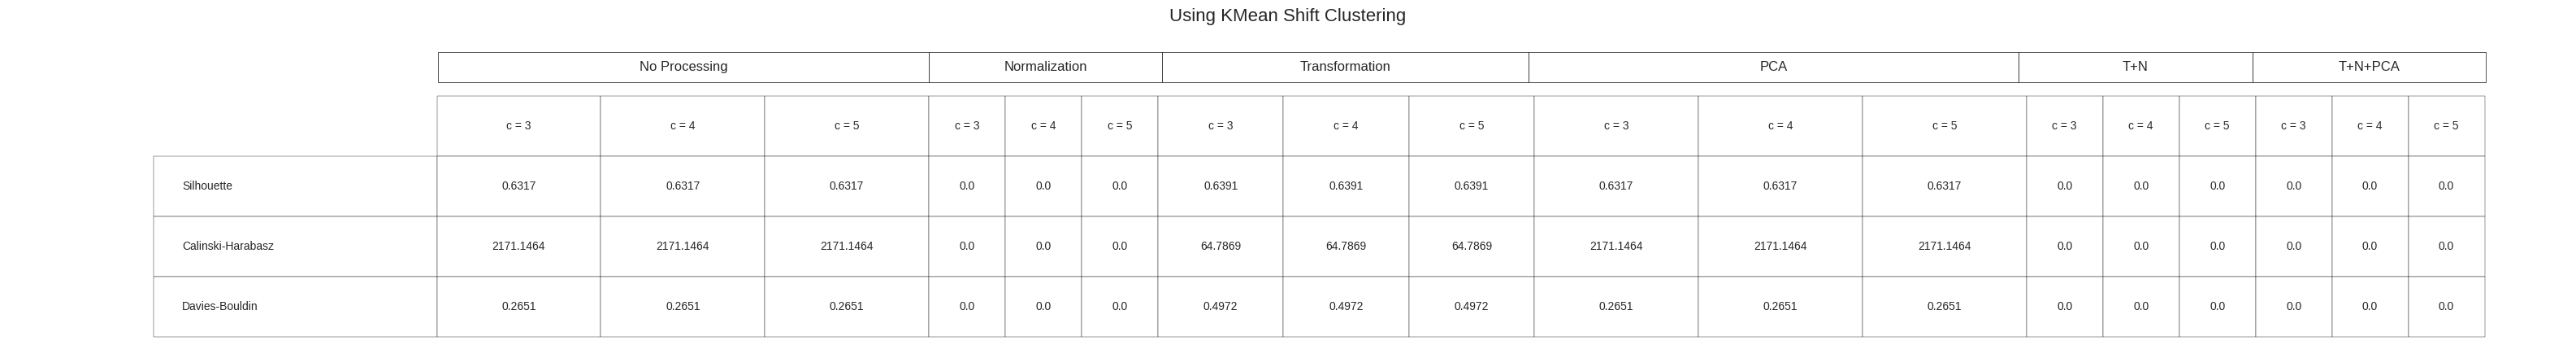

In [26]:
fig, axs = plt.subplots(2, 1, figsize=(32, 4), gridspec_kw={'height_ratios': [1, 8]})

# Headers Table
axs[0].axis('off')
headers_table = axs[0].table(cellText=[[header for header in headers[1:]]],
                             cellLoc='center',
                             loc='center',
                             bbox=[0.168, 0, 0.8, 1],
                             colWidths=[.63, .3, .47, .63, .3, .3])
headers_table.auto_set_font_size(False)
headers_table.set_fontsize(12)
for _, cell in headers_table.get_celld().items():
    cell.set_linewidth(0.5)

column_widths = [0.15] * len(combined_df.columns)  # Adjust this as per your requirements

# Main Table
axs[1].axis('off')
main_table = axs[1].table(cellText=combined_df.values,
                          rowLabels=combined_df.index,
                          colLabels=[f'{col[1]}' for col in combined_df.columns],
                          loc='center',
                          cellLoc='center',
                          bbox=[0.1, 0, 0.8, 1],
                          colWidths=column_widths)
main_table.auto_set_font_size(False)
main_table.set_fontsize(10)
for i, col in enumerate(combined_df.columns):
    column_width = max(len(str(item)) for item in combined_df[col]) + 2
    main_table.auto_set_column_width([i])

fig.tight_layout(pad=1.5)
plt.subplots_adjust(hspace=0.1)
plt.title('Using KMean Shift Clustering', fontsize=16, ha='center', va='center', y=1.3)
plt.savefig('combined_df_table_with_headers.png', bbox_inches='tight', dpi=300)
plt.show()